<a href="https://colab.research.google.com/github/Pranavi-chowdary99/Pranavi_HDS/blob/main/final/Pranavi_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

This project focuses on analyzing cardiovascular disease data with the goal of understanding mortality trends and identifying significant factors that influence cardiovascular health outcomes. The dataset spans several years (2005 to 2022) and includes various attributes such as death counts, mortality rates, cholesterol levels, age, weight, smoking, alcohol consumption, and physical activity.

The project involves:

* Data Collection: Gathering data related to cardiovascular disease mortality across different states in the U.S. for multiple years, allowing for temporal and geographical comparisons.
*  Exploratory Data Analysis (EDA): Conducting basic EDA to identify missing values, outliers, and key patterns in the dataset. This step helps in cleaning and transforming the data for further analysis.
* Pivot Tables: Creating pivot tables to summarize the data, allowing for comparisons across multiple variables such as age, cholesterol levels, smoking habits, and more. This provides insights into the relationship between these variables and cardiovascular mortality.
* Visualization: Developing various visualizations including bar charts, choropleth maps, and line charts to help communicate the findings effectively. The visualizations highlight trends over time and geographical variations in death rates and disease prevalence.
* Analysis: Performing an in-depth analysis to identify regions with the highest mortality rates, trends over the years, and potential correlations between lifestyle factors (e.g., smoking, alcohol consumption) and death rates.

The findings of this project aim to inform public health policies, raise awareness about cardiovascular risks, and contribute to the broader understanding of health disparities across states and years.










----

# **Datasets used**

----

**Cardiovascular disease dataset**

https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data

The Cardiovascular Disease Dataset from Kaggle provides comprehensive data on individuals’ health attributes, including information about age, cholesterol levels, weight, smoking habits, and activity levels. The dataset is used to analyze cardiovascular disease risk factors and the associated mortality rates, allowing for an exploration of how these factors contribute to heart disease development.

-----

**Heart Disease Mortality**

https://www.cdc.gov/nchs/pressroom/sosmap/heart_disease_mortality/heart_disease.htm

The Heart Disease Mortality dataset from the Centers for Disease Control and Prevention (CDC) offers data on heart disease mortality rates across different states in the United States. This dataset spans several years, allowing for temporal and geographical comparisons of death rates, which can provide valuable insights into trends, risk factors, and the effectiveness of healthcare initiatives aimed at reducing heart disease mortality.

----
**US States and Abbreviations**

https://github.com/jasonong/List-of-US-States/blob/master/states.csv

The US States and Abbreviations dataset provides a list of all U.S. states and their corresponding abbreviations. This dataset is crucial for mapping data to state regions, especially when analyzing state-specific data such as mortality rates, healthcare statistics, or other state-level indicators. It helps standardize the naming conventions of states, making it easier to merge with other datasets for analysis.

----

# **Import the datasets**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cardioVascular = pd.read_json('Cardio_data.json')

In [ ]:
cardioVascular_mortality = pd.read_csv('CardioVascular_Mortality.csv')

In [ ]:
States = pd.read_csv("states.csv")

# **Data Transformations**

In [ ]:
cardioVascular.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Convert age from days to years
cardioVascular['age'] = (cardioVascular['age'] / 365.25).round(0)

# Display the first few rows to verify the change
cardioVascular.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Tansform all the columns accordingly based on the data. change all binary columns to descriptive

cardioVascular['gender'] = cardioVascular['gender'].map({1: 'male', 2: 'female'})
cardioVascular['cholesterol'] = cardioVascular['cholesterol'].map({1: 'normal', 2: 'above normal', 3: 'well above normal'})
cardioVascular['gluc'] = cardioVascular['gluc'].map({1: 'normal', 2: 'above normal', 3: 'well above normal'})
cardioVascular['smoke'] = cardioVascular['smoke'].map({1: 'Yes', 0: 'No'})
cardioVascular['alco'] = cardioVascular['alco'].map({1: 'Yes', 0: 'No'})
cardioVascular['active'] = cardioVascular['active'].map({1: 'Yes', 0: 'No'})
cardioVascular['cardio'] = cardioVascular['cardio'].map({1: 'Yes', 0: 'No'})

In [ ]:
cardioVascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         70000 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 6.9+ MB


In [ ]:
# Convert the specified columns to categorical data type
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

for column in categorical_columns:
    cardioVascular[column] = cardioVascular[column].astype('category')

In [ ]:
cardioVascular.dropna(inplace=True)

In [ ]:
# Standardizing Data

cardioVascular['gender'] = cardioVascular['gender'].str.lower()
cardioVascular['cholesterol'] = cardioVascular['cholesterol'].str.lower()
cardioVascular['gluc'] = cardioVascular['gluc'].str.lower()

In [ ]:
# Adding a new column Age categories

bins = [0, 30, 40, 50, np.inf]
labels = ['Under 30', '30-40', '40-50', 'Above 50']
cardioVascular['age_category'] = pd.cut(cardioVascular['age'], bins=bins, labels=labels, right=False)

In [ ]:
# Creating a new Calculate Column BMI

cardioVascular['BMI'] = cardioVascular['weight'] / (cardioVascular['height'] / 100) ** 2

In [ ]:
cardioVascular_mortality

,YEAR,STATE,RATE,DEATHS,URL
0,2022,AL,234.2,14958,/nchs/pressroom/states/alabama/al.htm
1,2022,AK,145.7,1013,/nchs/pressroom/states/alaska/ak.htm
2,2022,AZ,148.5,14593,/nchs/pressroom/states/arizona/az.htm
3,2022,AR,224.1,8664,/nchs/pressroom/states/arkansas/ar.htm
4,2022,CA,142.4,66340,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
496,2005,VA,203.0,14192,/nchs/pressroom/states/virginia/va.htm
497,2005,WA,180.5,10985,/nchs/pressroom/states/washington/wa.htm
498,2005,WV,253.6,5538,/nchs/pressroom/states/westvirginia/wv.htm
499,2005,WI,190.6,11842,/nchs/pressroom/states/wisconsin/wi.htm


In [ ]:
# Dropping null values

cardioVascular_mortality.dropna(inplace=True)

In [ ]:
cardioVascular_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    501 non-null    int64  
 1   STATE   501 non-null    object 
 2   RATE    501 non-null    float64
 3   DEATHS  501 non-null    object 
 4   URL     501 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB


In [ ]:
# Remove the "URL" column from the cardioVascular_mortality DataFrame
cardioVascular_mortality = cardioVascular_mortality.drop(columns=['URL'])

In [ ]:
# Assuming the DataFrame is named 'cardioVascular_mortality', let's convert 'DEATHS' to integer and 'STATE' to string
cardioVascular_mortality['DEATHS'] = cardioVascular_mortality['DEATHS'].str.replace(',', '').astype(int)
cardioVascular_mortality['STATE'] = cardioVascular_mortality['STATE'].astype('string')

# **Data Visualizaitons**

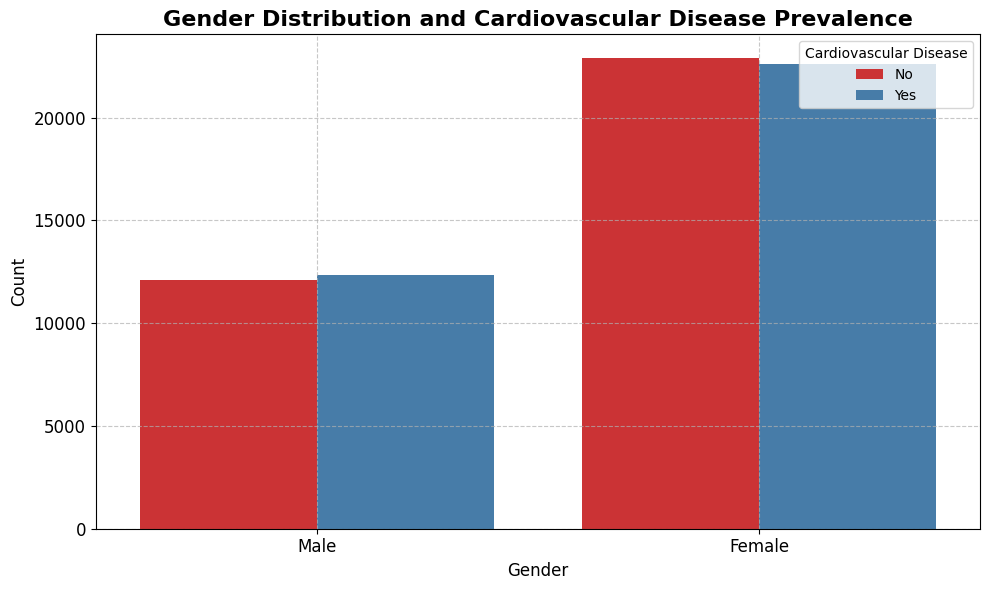

In [ ]:
# Gender Distribution and Cardiovascular Disease Prevalence

# Making the countplot more visually appealing with additional styling
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='cardio', data=cardioVascular, palette='Set1', dodge=True)

plt.title('Gender Distribution and Cardiovascular Disease Prevalence', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize the legend
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper right', fontsize=10)

# Customize the ticks
plt.xticks([0, 1], ['Male', 'Female'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout
plt.tight_layout()
plt.show()

The chart shows the count of individuals diagnosed with and without cardiovascular disease, split by gender. The red bars represent individuals without cardiovascular disease (No), while the blue bars represent individuals diagnosed with cardiovascular disease (Yes).

From the chart, we observe that the prevalence of cardiovascular disease is higher among females compared to males, as evidenced by the larger proportion of blue bars in the female category. The total counts for both males and females are fairly balanced, but the distribution of cardiovascular disease is notably more pronounced among the female population.

This chart is essential for understanding the gender-specific distribution of cardiovascular disease, highlighting the importance of gender as a factor in health outcomes.

----------

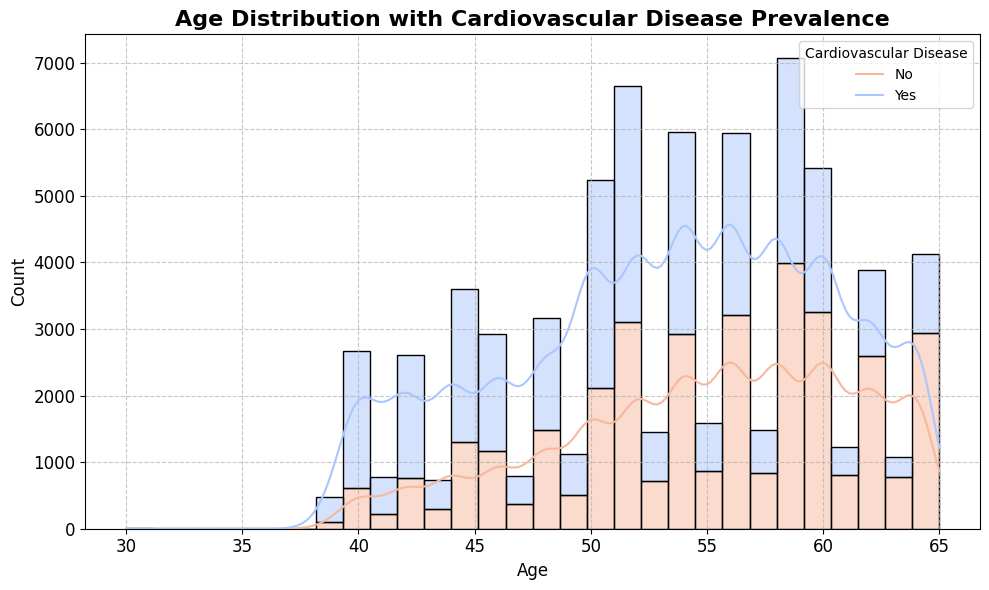

In [ ]:
# Age Distribution with Cardiovascular Disease Prevalence

plt.figure(figsize=(10, 6))
sns.histplot(data=cardioVascular, x='age', hue='cardio', multiple="stack", bins=30, palette='coolwarm', kde=True)

plt.title('Age Distribution with Cardiovascular Disease Prevalence', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize the legend
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper right', fontsize=10)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout
plt.tight_layout()
plt.show()

The stacked bars represent the count of individuals with (blue) and without (red) cardiovascular disease across various age groups. Additionally, the smooth line graph shows the overall distribution of the disease prevalence, with the prevalence steadily increasing with age.

The chart highlights a clear trend where the incidence of cardiovascular disease becomes more pronounced in older age groups, particularly after the age of 45. The age groups between 40 and 50 have a significant number of individuals with cardiovascular disease, as indicated by the blue bars being much higher than the red ones. This visualization underscores the increasing risk of cardiovascular disease as individuals age, emphasizing the need for early intervention and preventive measures in middle-aged populations.

---------------

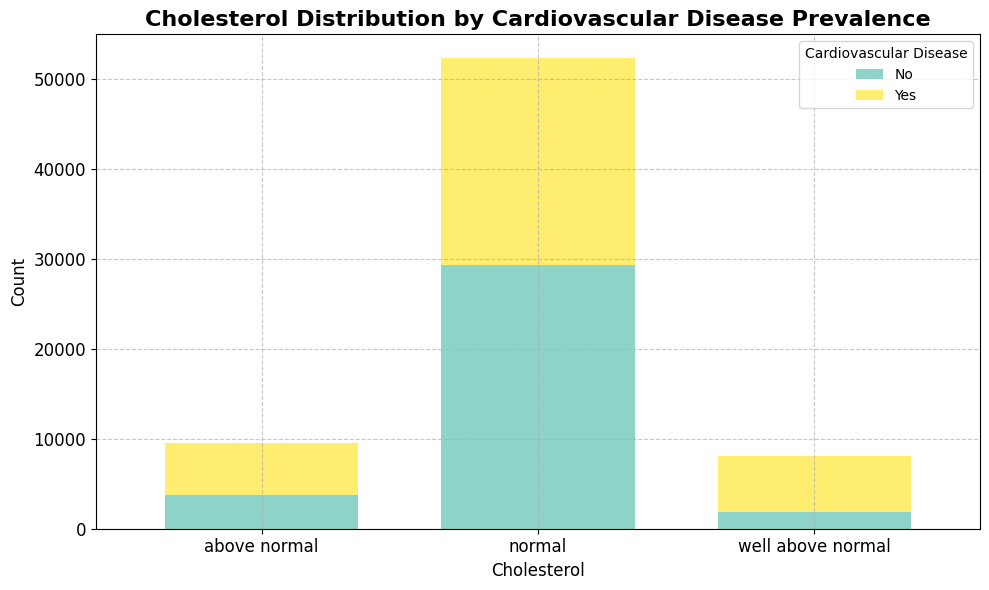

In [ ]:
# Create the stacked bar plot with cholesterol on the X-axis and the legend showing who has cardiovascular disease
chol_gluc = pd.concat([cardioVascular['cholesterol'], cardioVascular['cardio']], axis=1)
chol_gluc.columns = ['Cholesterol', 'Cardio']
chol_gluc_count = chol_gluc.groupby(['Cholesterol', 'Cardio'], observed=False).size().unstack(fill_value=0)

# Create the plot with Cholesterol on X-axis and stacked bars for Cardio
chol_gluc_count.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3', width=0.7)

plt.title('Cholesterol Distribution by Cardiovascular Disease Prevalence', fontsize=16, fontweight='bold')
plt.xlabel('Cholesterol', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize the legend
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper right', fontsize=10)

# Customize the ticks
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout
plt.tight_layout()
plt.show()


The chart uses stacked bars to show the count of individuals in each cholesterol category: above normal, normal, and well above normal.

From the chart, we observe that the majority of individuals fall into the "normal" cholesterol category, with a significant number of individuals who do not have cardiovascular disease (indicated by the green bars). However, the prevalence of cardiovascular disease (indicated by the yellow bars) is also noticeable across all cholesterol categories, especially in the "normal" category. This visualization underscores the importance of monitoring cholesterol levels in managing cardiovascular health.

-------------

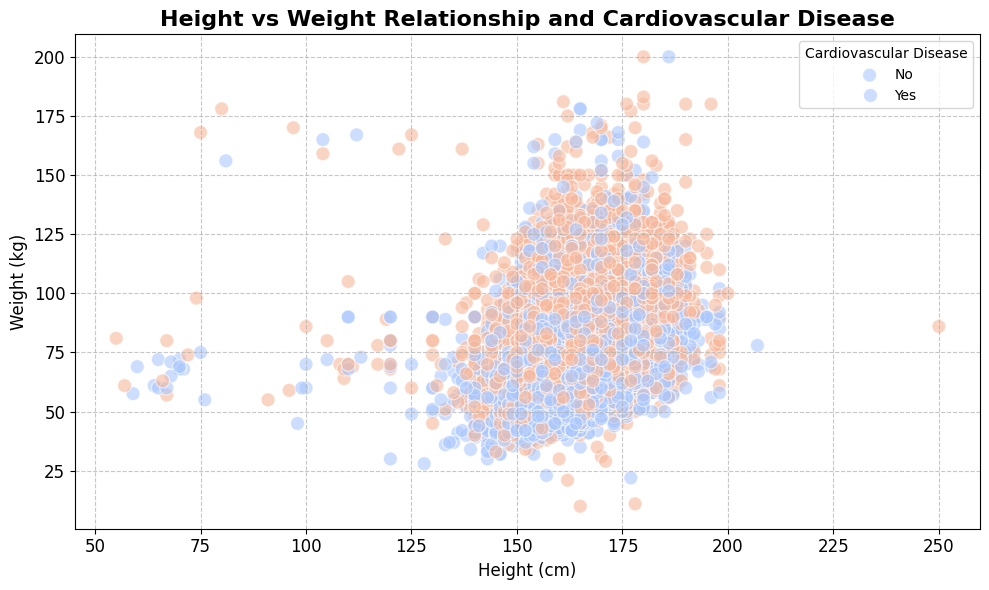

In [ ]:
# Height vs Weight Relationship (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=cardioVascular, hue='cardio', palette='coolwarm', alpha=0.6, s=100, edgecolor='w')

plt.title('Height vs Weight Relationship and Cardiovascular Disease', fontsize=16, fontweight='bold')
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)

# Customize the legend
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper right', fontsize=10)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout
plt.tight_layout()
plt.show()

The scatter plot titled "Height vs Weight Relationship and Cardiovascular Disease" shows the relationship between height and weight, with individuals marked based on the presence or absence of cardiovascular disease. The blue dots represent those without cardiovascular disease, and the orange dots represent those with it. The plot indicates that most individuals fall within a similar weight range, with a slight trend suggesting that individuals with higher weight may have a higher prevalence of cardiovascular disease, particularly in certain height ranges.

--------

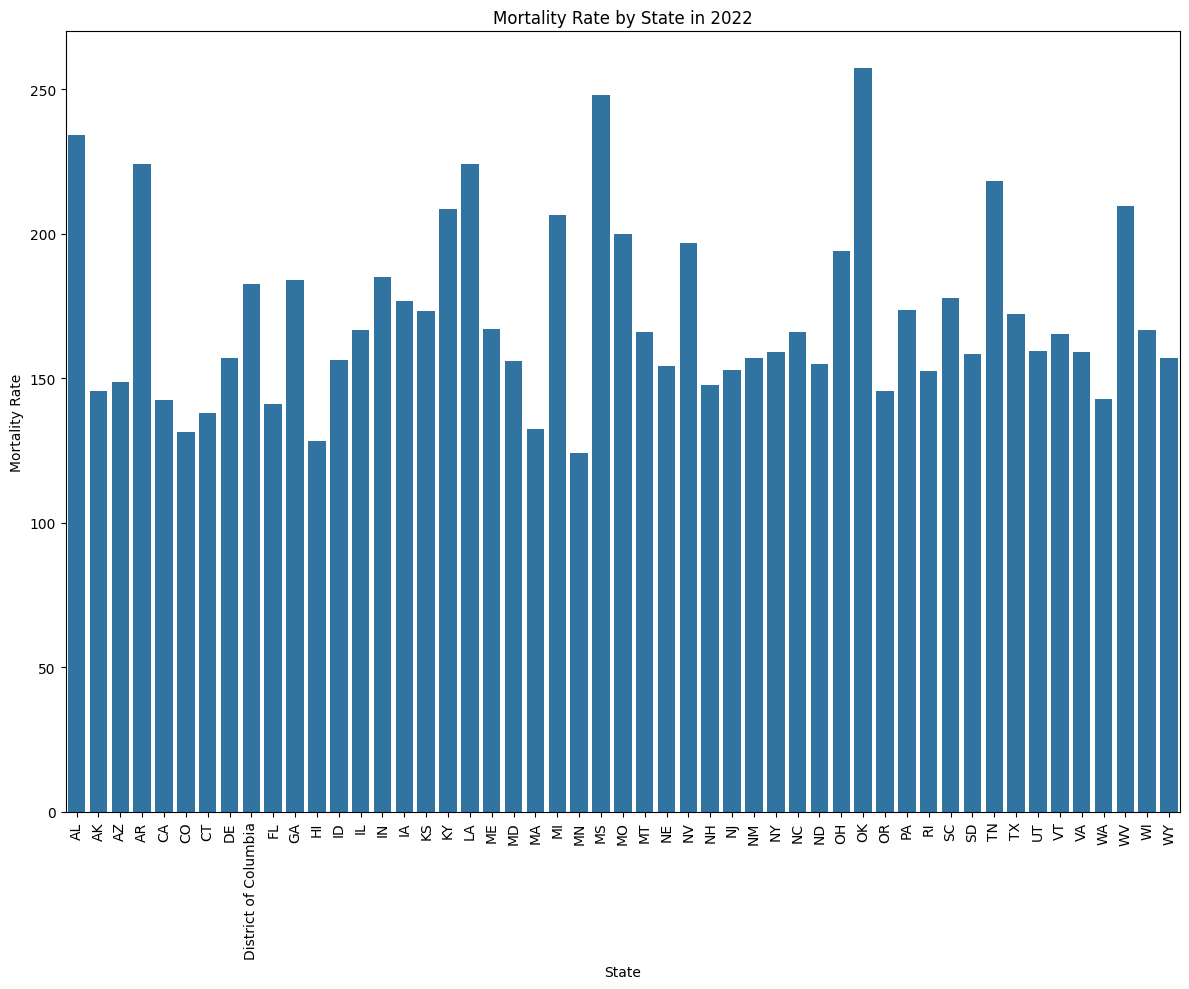

In [ ]:
# Filter the data for the year 2022 from the cardioVascular_mortality DataFrame
cardioVascular_mortality_2022 = cardioVascular_mortality[cardioVascular_mortality['YEAR'] == 2022]

# Plot the bar chart for the rate in 2022
plt.figure(figsize=(12, 10))
sns.barplot(x='STATE', y='RATE', data=cardioVascular_mortality_2022)

plt.title('Mortality Rate by State in 2022')
plt.xlabel('State')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Data visualizations by merging Datasets**

In [ ]:
# Split the data into two DataFrames for 2021 and 2022
cardioVascular_mortality_2022 = cardioVascular_mortality[cardioVascular_mortality['YEAR'] == 2022]
cardioVascular_mortality_2021 = cardioVascular_mortality[cardioVascular_mortality['YEAR'] == 2021]

In [ ]:
# Merge the two DataFrames ( 2022 and 2021 ) on 'STATE'

Merged_Cardio_2021_2022 = pd.merge(cardioVascular_mortality_2021[['STATE', 'DEATHS']].rename(columns={'DEATHS': 'Deaths_2021'}),
                     cardioVascular_mortality_2022[['STATE', 'DEATHS']].rename(columns={'DEATHS': 'Deaths_2022'}),
                     on='STATE', how='inner')

# Calculate the change in deaths
Merged_Cardio_2021_2022['Death_rate_change'] = ((Merged_Cardio_2021_2022['Deaths_2022'] - Merged_Cardio_2021_2022['Deaths_2021'])/Merged_Cardio_2021_2022['Deaths_2021'])*100

In [ ]:
Merged_Cardio_2021_2022.head()

,STATE,Deaths_2021,Deaths_2022,Death_rate_change
0,AL,15173,14958,-1.416991
1,AK,1011,1013,0.197824
2,AZ,14550,14593,0.295533
3,AR,8547,8664,1.368901
4,CA,65471,66340,1.327305


In [ ]:
States.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
# Merge the Merged_Cardio_2021_2022 with States dataset to get full names of states
# First, let's rename 'STATE' column in 'Merged_Cardio_2021_2022' to 'State' to match the column name in 'States' dataset
Merged_Cardio_2021_2022 = Merged_Cardio_2021_2022.rename(columns={'STATE': 'Abbreviation'})

# Merge the two datasets on 'State' column
merged_final = pd.merge(Merged_Cardio_2021_2022, States, on='Abbreviation', how='left')

In [ ]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Abbreviation       50 non-null     object 
 1   Deaths_2021        50 non-null     int64  
 2   Deaths_2022        50 non-null     int64  
 3   Death_rate_change  50 non-null     float64
 4   State              50 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


In [ ]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Abbreviation       50 non-null     object 
 1   Deaths_2021        50 non-null     int64  
 2   Deaths_2022        50 non-null     int64  
 3   Death_rate_change  50 non-null     float64
 4   State              50 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


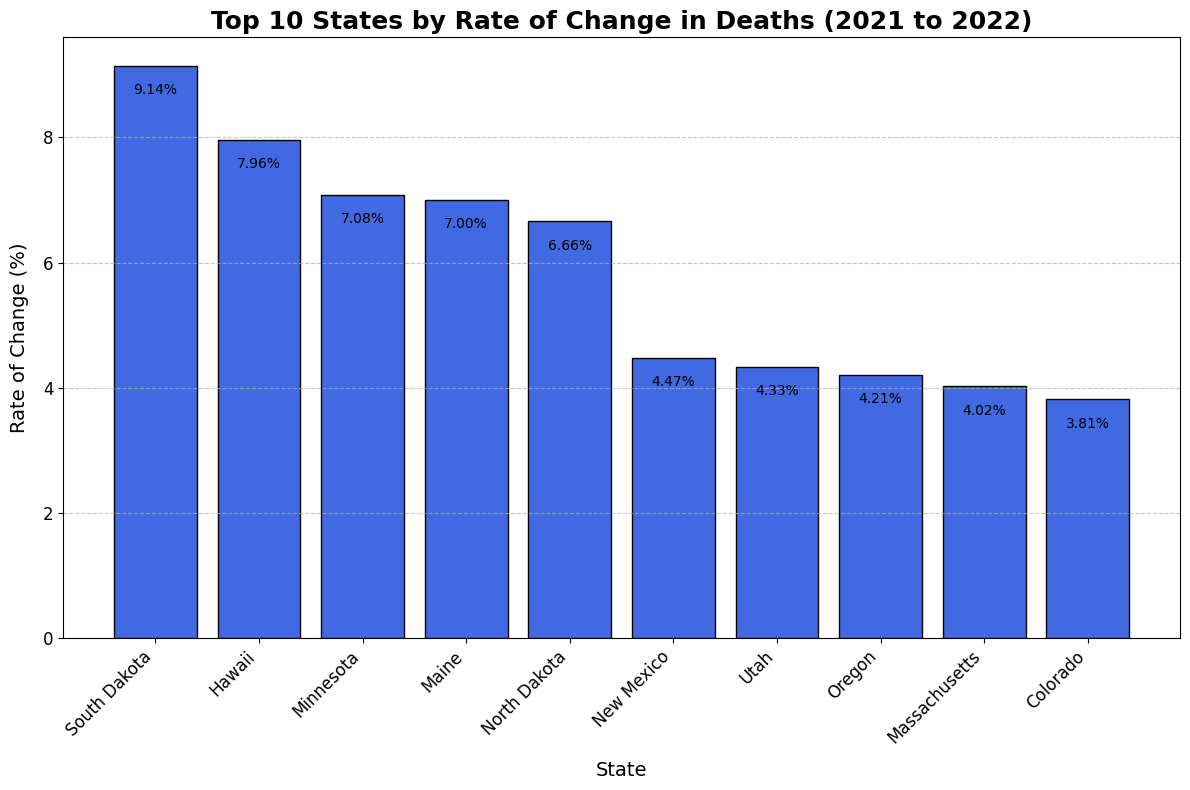

In [ ]:
top_10_states = merged_final.sort_values(by='Death_rate_change', ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_states['State'], top_10_states['Death_rate_change'], color='royalblue', edgecolor='black')

# Add title and labels
plt.title('Top 10 States by Rate of Change in Deaths (2021 to 2022)', fontsize=18, fontweight='bold')
plt.xlabel('State', fontsize=14, labelpad=10)
plt.ylabel('Rate of Change (%)', fontsize=14, labelpad=10)

# Customize tick labels
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)

for bar in bars:
    yval = bar.get_height()
    # Adjusting the placement to ensure percentages don't go outside the bars
    if yval > 0:  # Only annotate positive values
        plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10, color='black')


# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Create a choropleth map to visualize mortality data in 2022
fig = px.choropleth(merged_final,
                    locations='Abbreviation',
                    color='Deaths_2022',
                    hover_name='State',
                    color_continuous_scale='portland',
                    locationmode='USA-states',
                    title="State-wise Deaths in 2022")

# Customize the geography of the map
fig.update_geos(
    projection_type="albers usa",
    scope='usa',
)

fig.show()


The choropleth map displays the state-wise mortality data for 2022. Each state is colored according to its death count, with a gradient scale from blue (lower death count) to red (higher death count). The map visually highlights which states had the highest and lowest mortality rates, allowing for easy comparison across the United States. The color bar on the right indicates the range of deaths, with states like California and Texas showing significantly higher death counts.

# **Pivot tables**

In [ ]:
pivot_1 = cardioVascular.pivot_table(index=['cholesterol'],
                                     values=['age', 'weight'],
                                     aggfunc='mean')

pivot_1.head()

,age,weight
cholesterol,,
above normal,53.677663,76.666464
normal,52.794693,73.053862
well above normal,56.162038,78.773085



 This average age and average weight for individuals based on their cholesterol levels. It groups the data by three categories of cholesterol: "above normal," "normal," and "well above normal." The analysis shows that individuals with "well above normal" cholesterol tend to have a slightly higher average age (56.16 years) and weight (78.77 kg) compared to those with "above normal" (53.68 years, 76.67 kg) and "normal" cholesterol levels (52.79 years, 73.05 kg). This indicates that individuals with higher cholesterol levels tend to be slightly older and heavier on average.

 ------------

In [ ]:
pivot_2 = cardioVascular.pivot_table(index=['active', 'alco', 'smoke'],
                                     values='id', aggfunc='count',
                                     observed=False)

pivot_2.head()

id
active alco smoke       
No     No   No     12435
            Yes      725
       Yes  No       297
            Yes      282
Yes    No   No     49486

This table counts the number of individuals based on their activity, alcohol consumption, and smoking habits. The data is broken down into four categories: those who are active or not active and whether they consume alcohol or smoke. For example, there are 12,435 individuals who are neither active, smoke, nor consume alcohol. On the other hand, fewer individuals (297) are both active, smoke, and drink alcohol. This table highlights the distribution of lifestyle factors, with the majority of individuals falling into the non-active and non-smoking categories.

----------







In [ ]:
pivot_deaths_by_state_year = cardioVascular_mortality.pivot_table(index=['STATE'], values='DEATHS', aggfunc='sum')

pivot_deaths_by_state_year

,DEATHS
STATE,
AK,8497
AL,136044
AR,82126
AZ,125965
CA,632054
CO,74178
CT,71361
DE,20513
District of Columbia,1239


This pivot table aggregates the total deaths for each state in the dataset. It is useful for identifying which states have the highest mortality rates due to cardiovascular diseases, helping to prioritize areas for healthcare interventions.

---------

In [ ]:
pivot_rate_by_year = cardioVascular_mortality.pivot_table(index='YEAR', values=['RATE','DEATHS'], aggfunc={'DEATHS': 'sum', 'RATE': 'mean'})

pivot_rate_by_year

,DEATHS,RATE
YEAR,,
2005,650573,210.340000
2014,613024,166.954000
2015,632625,168.482000
2016,633885,166.076000
2017,646173,165.510000
2018,654086,164.296000
2019,657854,163.688000
2020,695612,169.000000
2021,694259,177.110000


This pivot table calculates the total deaths and average mortality rate for each year in the dataset. It is useful for tracking the overall mortality trends and the average cardiovascular disease mortality rate over time, helping to identify if mortality rates are improving or worsening year by year.

-------------

# Conclusion
In this project, I collected data related to cardiovascular disease and mortality rates from different sources. The dataset provided valuable information about death counts and rates for various states in the United States over multiple years, particularly focusing on the year 2022. The initial step involved performing basic Exploratory Data Analysis (EDA) to understand the data structure, clean the dataset, and check for missing values.

Through this process, I transformed and formatted the data, ensuring that columns such as state names, cholesterol levels, and death rates were appropriately handled. Additionally, pivot tables were created to summarize and explore relationships between different variables, such as age categories, cholesterol levels, and cardiovascular disease prevalence.

To gain deeper insights from the data, I created various visualizations including bar charts, choropleth maps, and heatmaps. These visualizations allowed for a clear representation of how cardiovascular mortality rates varied by state, the impact of age and cholesterol on disease prevalence, and the rate of change in death counts between different years.

By integrating geographic data and mortality rates, I was able to visualize state-level differences using choropleth maps, which provided a detailed view of how the death rate changed across the country. The final maps and charts offered a visually compelling understanding of the factors influencing cardiovascular disease mortality.

In conclusion, this project demonstrated the power of data analysis and visualization in public health. By applying basic EDA, pivot tables, and interactive visualizations, I was able to uncover significant patterns and trends in the data that could help inform healthcare policies and interventions.